Zadanie 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}
BODY_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
threshold=0.5

In [2]:
protoTxt = "C:/Users/juleq/OneDrive/Desktop/micm_lab1/OpenPose/pose_deploy_linevec_faster_4_stages.prototxt"
wagi = "C:/Users/juleq/OneDrive/Desktop/micm_lab1/OpenPose/pose_iter_160000.caffemodel"

# wczytanie sieci
net = cv2.dnn.readNetFromCaffe(protoTxt, wagi)

frame = cv2.imread("C:/Users/juleq/OneDrive/Desktop/micm_lab1/6_a.jpg") 

In [3]:
frameWidth= frame.shape[1]
frameHeight= frame.shape[0]
# rozmiar input
inHeight = 368
inWidth = int((inHeight/frameHeight)*frameWidth)

# przygotowanie obrazu
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# ustawienie jako input
net.setInput(inpBlob)
#predykcja
output = net.forward()

In [4]:
#rysowanie punktów na obrazie
keypointNo=output.shape[1]
frame2=frame.copy()

H = output.shape[2]
W = output.shape[3]
# pusta lista do przechowywania punktów
points = []

for i in range(16):
    # confidence map dla każdego punktu
    probMap = output[0, i, :, :]

    # szukanie maximum na probMap
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # skalowanie - do wyświetlenia
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold :
        cv2.circle(frame2, (int(x), int(y)), 5, (147,20,255), thickness=2, lineType=cv2.FILLED)
        cv2.putText(frame2, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (180,110,255), 2, lineType=cv2.LINE_AA)
    
        points.append((int(x), int(y)))
    else :
        points.append(None)
    
cv2.imshow("Keypoints",frame2)
cv2.waitKey(0)


-1

In [5]:
#tworzenie szkieletu używając listy points
frame3=frame.copy()

for pair in BODY_PAIRS:
    #pierwsza część pary
    start = pair[0]
    #druga część pary
    end = pair[1]
    
#assert(start in BODY_PARTS)
#assert(end in BODY_PARTS)

    idFrom = BODY_PARTS[start]
    idTo = BODY_PARTS[end]

    if points[idFrom] and points[idTo]:
        cv2.line(frame3, points[idFrom], points[idTo], (0, 0, 255), 3)
        cv2.ellipse(frame3, points[idFrom], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
        cv2.ellipse(frame3, points[idTo], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
        cv2.putText(frame3, str(idFrom), points[idFrom], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2,
               cv2.LINE_AA)
        
        cv2.putText(frame3, str(idTo), points[idTo], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2,
               cv2.LINE_AA)

cv2.imshow("Lines",frame3)
cv2.waitKey(0)

#tu wpisz swój kod
 

-1

In [6]:
#Nałożenie jednego punktu wg confidence map na obraz
frame4=frame.copy()
pkt = 5  #left Shoulder
probMap = output[0, pkt, :, :]
probMap = cv2.resize(probMap, (frameWidth, frameHeight))
probMap_n = np.abs(probMap*255)

probMap2 = cv2.cvtColor(probMap_n,cv2.COLOR_GRAY2RGB)
probMap2[:,:,0]=0
probMap2[:,:,1]=0

frame4=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#nałożenie obrazu i probMap2
frame5 = cv2.addWeighted(frame4, 0.4, probMap2, 0.6, 0, dtype=cv2.CV_32F).astype(np.uint8)

cv2.imshow("Confidence Map",probMap)
cv2.imshow("One Keypoint",frame5)

cv2.waitKey(0)
cv2.destroyAllWindows()

Zadanie 2

In [21]:
A = cv2.imread("C:/Users/juleq/OneDrive/Desktop/micm_lab1/man.jpg")

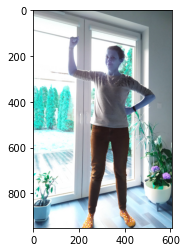

In [22]:
plt.imshow(A)

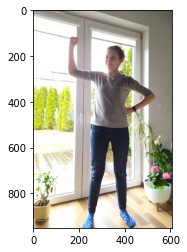

In [23]:
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))

In [24]:
frameWidth= A.shape[1]
frameHeight= A.shape[0]

# rozmiar input
inHeight = 368
inWidth = int((inHeight/frameHeight)*frameWidth)

# przygotowanie obrazu
inpBlob = cv2.dnn.blobFromImage(A, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# ustawienie jako input
net.setInput(inpBlob)
#predykcja
output = net.forward()

In [25]:
#rysowanie punktów na obrazie
keypointNo=output.shape[1]
frame5 = A.copy()

H = output.shape[2]
W = output.shape[3]
# pusta lista do przechowywania punktów
points = []

for i in range(16):
    # confidence map dla każdego punktu
    probMap = output[0, i, :, :]

    # szukanie maximum na probMap
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # skalowanie - do wyświetlenia
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold :
        cv2.circle(frame5, (int(x), int(y)), 5, (255,110,180), thickness=2, lineType=cv2.FILLED)
        cv2.putText(frame5, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, lineType=cv2.LINE_AA)
        
        points.append((int(x), int(y)))
    else :
        points.append(None)
    
cv2.imshow("Keypoints", frame5)
cv2.waitKey(0)


-1

In [26]:
#tworzenie szkieletu używając listy points
frame6 = A.copy()

for pair in BODY_PAIRS:
    #pierwsza część pary
    start = pair[0]
    #druga część pary
    end = pair[1]
    
#assert(start in BODY_PARTS)
#assert(end in BODY_PARTS)

    idFrom = BODY_PARTS[start]
    idTo = BODY_PARTS[end]

    if points[idFrom] and points[idTo]:
        cv2.line(frame6, points[idFrom], points[idTo], (0, 0, 255), 3)
        cv2.ellipse(frame6, points[idFrom], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
        cv2.ellipse(frame6, points[idTo], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
        cv2.putText(frame6, str(idFrom), points[idFrom], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame6, str(idTo), points[idTo], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2, cv2.LINE_AA)

cv2.imshow("Lines", frame6)
cv2.waitKey(0)

#tu wpisz swój kod
 

-1

In [27]:
head_point = points[BODY_PARTS["Head"]]
r_wrist_point = points[BODY_PARTS["RWrist"]]
l_wrist_point = points[BODY_PARTS["LWrist"]]

if head_point and r_wrist_point and l_wrist_point:
    if head_point[1] > r_wrist_point[1] and head_point[1] > l_wrist_point[1]:
        pose = "Rece nad glowa"
        print("Rece nad glowa")
        cv2.putText(frame6, pose, (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 2, cv2.LINE_AA)
        cv2.imshow("Poza", frame6)
        cv2.waitKey(0)
    else:
        pose = "Poza nieznana"
        print("Poza nieznana")
        cv2.putText(frame6, pose, (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 2, cv2.LINE_AA)
        cv2.imshow("Poza", frame6)
        cv2.waitKey(0)

Poza nieznana


Zadanie 3

In [28]:
def tworzenie_obrazu(frame):    
    frameWidth= frame.shape[1]
    frameHeight= frame.shape[0]
    # rozmiar input
    inHeight = 368
    inWidth = int((inHeight/frameHeight)*frameWidth)

    # przygotowanie obrazu
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

    # ustawienie jako input
    net.setInput(inpBlob)
    #predykcja
    return net.forward()

In [29]:
def rysowanie_punktow(frame, output):
    
    frameWidth= frame.shape[1]
    frameHeight= frame.shape[0]
    H = output.shape[2]
    W = output.shape[3]
    
    # pusta lista do przechowywania punktów
    points = []
    
    for i in range(16):
        # confidence map dla każdego punktu
        probMap = output[0, i, :, :]
        
        # szukanie maximum na probMap
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        
        # skalowanie - do wyświetlenia
        x = (frameWidth * point[0]) / W
        y = (frameHeight * point[1]) / H
        
        if prob > threshold :
            cv2.circle(frame, (int(x), int(y)), 5, (0, 255, 255), thickness=2, lineType=cv2.FILLED)
            cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3, lineType=cv2.LINE_AA)
            points.append((int(x), int(y)))
        else :
            points.append(None)
        
    return points

In [30]:
def pozycja(points, frame):
    head_point = points[BODY_PARTS["Head"]]
    r_wrist_point = points[BODY_PARTS["RWrist"]]
    l_wrist_point = points[BODY_PARTS["LWrist"]]

    if head_point and r_wrist_point and l_wrist_point:
        if head_point[1] > r_wrist_point[1] and head_point[1] > l_wrist_point[1]:
            pose = "Rece nad glowa"
            print("Rece nad glowa")
            cv2.putText(frame, pose, (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 2, cv2.LINE_AA)
            cv2.imshow("Poza", frame)
           
        else:
            pose = "Poza nieznana"
            print("Poza nieznana")
            cv2.putText(frame, pose, (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,0,0), 2, cv2.LINE_AA)
            cv2.imshow("Poza", frame)

In [35]:
def szkielet(frame, points):
    for pair in BODY_PAIRS:
        #pierwsza część pary
        start = pair[0]
        #druga część pary
        end = pair[1]
        cv2.line(frame, points[BODY_PARTS[start]] , points[BODY_PARTS[end]], [255, 0, 0], 2)
        
        idFrom = BODY_PARTS[start]
        idTo = BODY_PARTS[end]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (0, 0, 255), 3)
            cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (255,110,180), cv2.FILLED)
            cv2.putText(frame, str(idFrom), points[idFrom], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, str(idTo), points[idTo], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255, 255), 2, cv2.LINE_AA)

In [34]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    
    output = tworzenie_obrazu(frame)
    points = rysowanie_punktow(frame, output)
    szkielet(frame, points)
    pozycja(points, frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
Poza nieznana
